In [30]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
import network_generation as homomul
import spread_simulation
import homophily_multi_attr_viz as homomul_viz

# Multi-Attribute Homophily

The configuration of our social networks has a profound impact on our everyday lives. It
determines our career success, socioeconomic status, and overall health. Homophily, the
tendency to associate with similar individuals, is a critical factor in the formation of social
ties. Traditional studies on homophily have focused on one sociodemographic dimension,
such as ethnicity, gender, or socioeconomic status. However, this project aims to move
beyond these limitations by examining the intersection and correlation of multiple dimensions.
Our interactions are not solely determined by our group membership in one dimension but
by the combination of several dimensions. The project’s objective is to investigate how
multidimensional homophily and attribute correlation affect different social groups’ ability
to spread and access information. To achieve this goal, we will use a multidimensional
homophily network model to generate synthetic networks and perform spreading simulations.

## Model specs

N = Number of nodes \
Average degree = 2m

In [32]:
N = 3200
m = 5

### Population distribution

In [33]:
## Population fractions

correl_param = 0.9 ## Between 0 and 1
pop_fracs_lst = [[0.5,0.5],[0.5,0.5]] ## Marginal population distributions

## Joint population distribution. It's a tensor T where each element T[i1,i2,i3,...,iD] corresponds to the population fraction
## of the group (i1,i2,i3,...,iD). D is the total number of dimensions.
comp_pop_frac_tnsr = homomul.consol_comp_pop_frac_tnsr(pop_fracs_lst, correl_param) 
pprint(comp_pop_frac_tnsr)

array([[0.45, 0.05],
       [0.05, 0.45]])


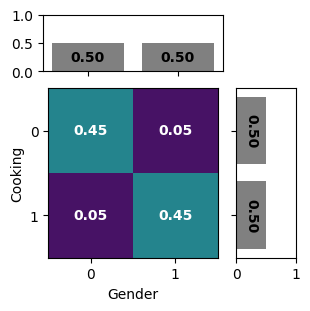

In [34]:
## Plot population distribution
homomul_viz.fig_2bin_comp_pop_frac(comp_pop_frac_tnsr)
plt.ylabel("Cooking")
plt.xlabel("Gender")
plt.show()

### Interaction preferences

**One-dimensional homophily / heterophily matrices** \
These metricies describe the likelihood two persons connect based on their value in only one dimension. 
So for dimension one (for example gender) the matrix describes the affinity of two persons based on their value in this dimension. 

We can create these one-dimensional homophily / heterophily matrices for each dimension in our attribute vector.

In [35]:
## One-dimensional matrices of connection preference
h=0.9
h1 = np.array([[h,1-h], [1-h,h]])
h2 = h1.copy()
h_mtrx_lst = np.array([h1,h2])

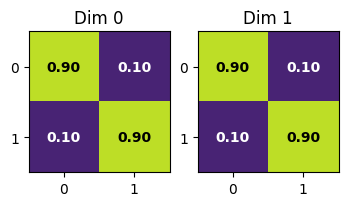

In [36]:
## Plot homophily / heterophily 1D matrices
plt.figure(figsize=(4,2))
ax = plt.subplot(1,2,1)
homomul_viz.fig_colored_matrix(
	h_mtrx_lst[0],
	ax=ax,
	xticks=[0,1],
	yticks=[0,1],
	show_colorbar=False,
	figsize=None,
	vmin=0,
	vmax=1
	)
plt.title("Dim 0")
ax = plt.subplot(1,2,2)
homomul_viz.fig_colored_matrix(
	h_mtrx_lst[1],
	ax=ax,
	xticks=[0,1],
	yticks=[0,1],
	show_colorbar=False,
	figsize=None,
	vmin=0,
	vmax=1
	)
plt.title("Dim 1")
plt.show()

**Aggregation type**

The Aggregation type specifies how the different one-dimensional homophilic tendencies combine. 
The core element of our model is an aggregation mechanism to compute the affinity (connection probability) between two individuals given their vectors of categorical attributes.

Uncompromising individuals may only make ties with people with whom they have high
affinity in all dimensions. This is equivalent to attempt a connection in all dimensions and consider the interaction
successful only if all attempts were successful.

In [37]:
homophily_kind = "all"
## all -> Attempt connection in every dimension. All attempts must be successful.

## Generate network

For network generation, the following creates a network based on Centola style connections. 
It creates N nodes based on the composition of the population (N nodes with the corresponding distribution in attributes). 

The generation process creates N*m edges (resulting in 2m average degree) by selecting random nodes and checking if their affinity is satisfied (based on the type of affinity). 


In [38]:
G_ER = homomul.am_v2(
            h, correl_param, 
            comp_pop_frac_tnsr,
            marginal_distribution = pop_fracs_lst,
            N=N,
            m=m
            )

In [39]:
## Export the network in gexf format to visualize it with gephi: https://gephi.org/
G_out = homomul.G_attr_to_str(G_ER,"attr") ## Change tuple to string so that gephi can read the file
nx.write_gexf(G_out, "partial_results/tests/ER_nw.gexf")

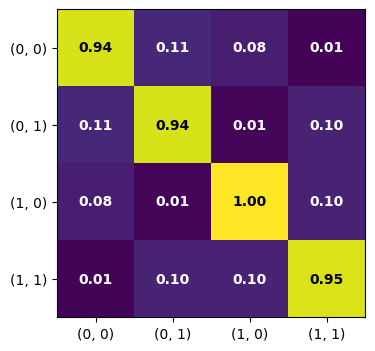

array([[0.93962476, 0.10968297, 0.08294414, 0.01145957],
       [0.10968297, 0.93764881, 0.01390717, 0.09531358],
       [0.08294414, 0.01390717, 1.        , 0.10122623],
       [0.01145957, 0.09531358, 0.10122623, 0.94542712]])

In [40]:
import network_stats
network_stats.homophily_matrix(G_ER)

## Simulation

In [41]:
initial = np.random.choice(G_ER.nodes, 1, replace=False)
initial = np.append(initial, [x for n in initial for x in list(G_ER.neighbors(n))])
G_ER_res = spread_simulation.complex_spread(G_ER, initial, 0.16)

In [42]:
spread_simulation.fraction_infected(G_ER)

0.995625

## Save Generated Networks for Gephi


In [51]:
correl_param = 0.9 ## Between 0 and 1
h = 0.9

def save_and_plot(h, correl_param): 
    pop_fracs_lst = [[0.5,0.5],[0.5,0.5]] ## Marginal population distributions
    comp_pop_frac_tnsr = homomul.consol_comp_pop_frac_tnsr(pop_fracs_lst, correl_param)
    G_ER = homomul.am_v2(
                h, correl_param, 
                comp_pop_frac_tnsr,
                marginal_distribution = pop_fracs_lst,
                N=N,
                m=m
                )
    ## Export the network in gexf format to visualize it with gephi: https://gephi.org/
    G_out = homomul.G_attr_to_str(G_ER,"attr") ## Change tuple to string so that gephi can read the file
    nx.write_gexf(G_out, f"partial_results/cor{correl_param}_h{h}.gexf")

    comp_pop_frac_tnsr = homomul.consol_comp_pop_frac_tnsr(pop_fracs_lst, correl_param) 
    ## Plot population distribution
    homomul_viz.fig_2bin_comp_pop_frac(comp_pop_frac_tnsr)
    plt.ylabel("College Degree")
    plt.xlabel("Income > 100k")
    plt.show()

    h1 = np.array([[h,1-h], [1-h,h]])
    h2 = h1.copy()
    h_mtrx_lst = np.array([h1,h2])
    ## Plot homophily / heterophily 1D matrices
    plt.figure(figsize=(4,2))
    ax = plt.subplot(1,2,1)
    homomul_viz.fig_colored_matrix(
        h_mtrx_lst[0],
        ax=ax,
        xticks=[0,1],
        yticks=[0,1],
        show_colorbar=False,
        figsize=None,
        vmin=0,
        vmax=1
        )
    plt.title("Dim 0")
    ax = plt.subplot(1,2,2)
    homomul_viz.fig_colored_matrix(
        h_mtrx_lst[1],
        ax=ax,
        xticks=[0,1],
        yticks=[0,1],
        show_colorbar=False,
        figsize=None,
        vmin=0,
        vmax=1
        )
    plt.title("Dim 1")
    plt.show()

    mh = np.kron(h1, h2)
    homomul_viz.fig_colored_matrix(
        mh,
        xticks=[(0,0),(0,1),(1,0),(1,1)],
        yticks=[(0,0),(0,1),(1,0),(1,1)],
        show_colorbar=False,
        figsize=None,
        vmin=0,
        vmax=1
        )
    plt.title("Multi-Dimension Homophily Matrix")
    plt.show()

    

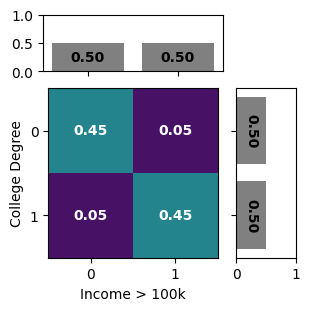

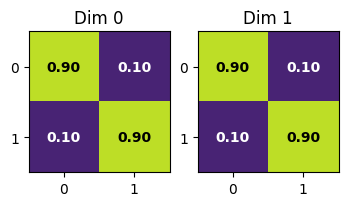

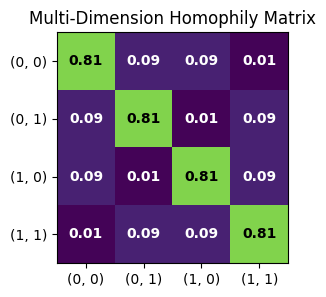

In [52]:
save_and_plot(0.9, 0.9)

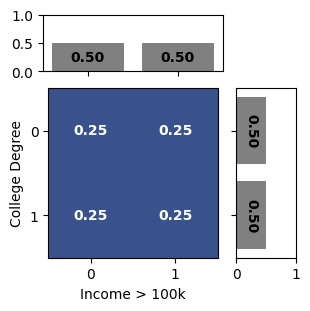

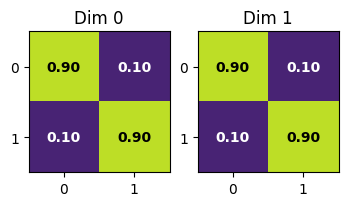

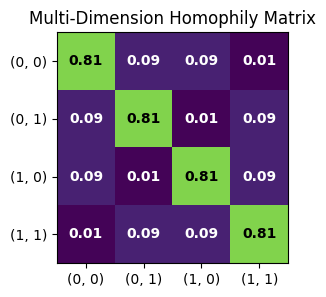

In [53]:
save_and_plot(0.9, 0.5)

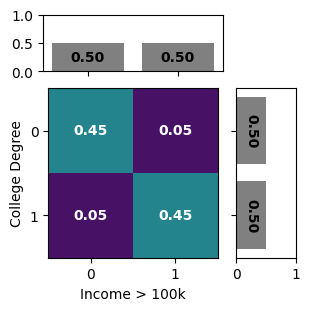

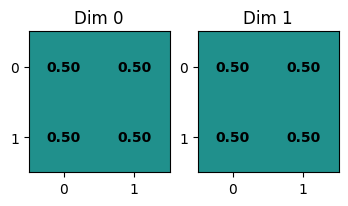

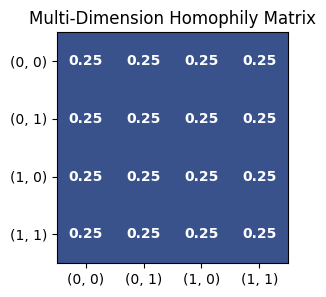

In [54]:
save_and_plot(0.5, 0.9)

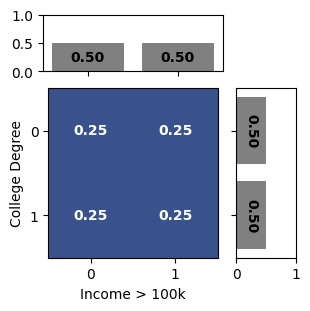

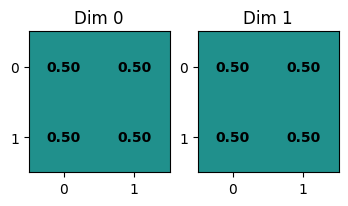

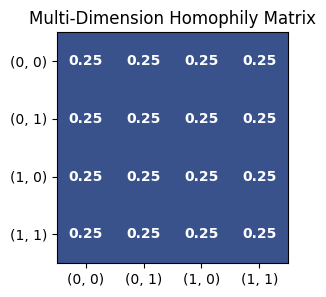

In [56]:
save_and_plot(0.5, 0.5)

## And for Social Origins Model

In [57]:
def save_som(alpha, beta): 
        G = homomul.social_origins_network(
                N=3200,
                m=5,
                alpha=alpha,
                beta=beta,
                H=32,
                D=10,
                dimension_aggrigation=min)
        G_out = homomul.G_attr_to_str(G,"attr") ## Change tuple to string so that gephi can read the file
        nx.write_gexf(G_out, f"partial_results/alpha{alpha}_beta{beta}.gexf")

In [58]:
save_som(-1, -1)
save_som(-1, 1)
save_som(-1, 3)
save_som(1, -1)
save_som(1, 1)
save_som(1, 3)
save_som(3, -1)
save_som(3, 1)
save_som(3, 3)